# RUN THE MODEL

#### SET THE PATH

In [1]:
import sys
sys.path.append('../scripts')  # Add the scripts directory to the Python path

from MainModel import MainModel

#### INITIATE THE MODEL

Simulation reached the maximum number of steps


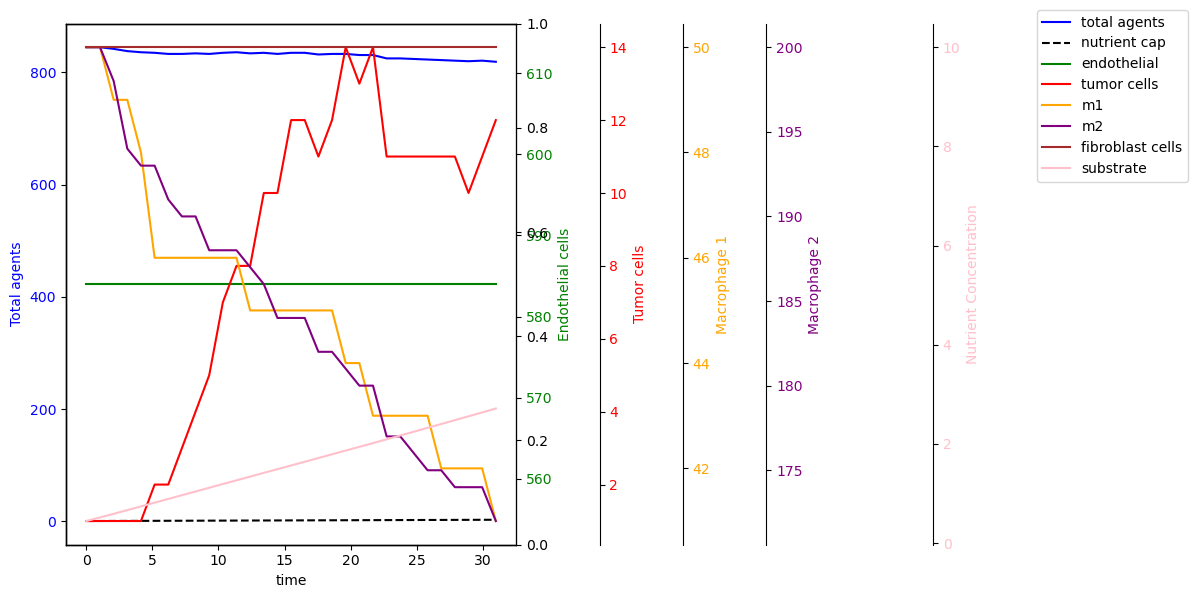

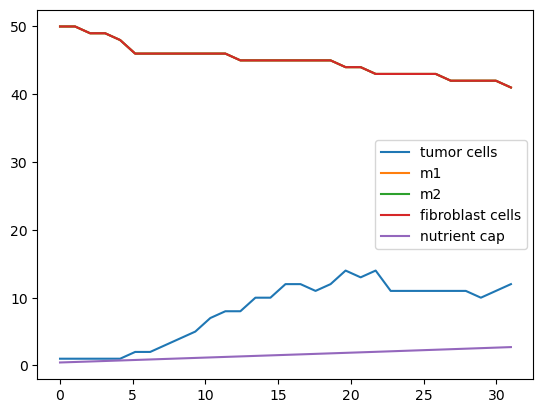

In [3]:
model = MainModel(30)

for i in range(32):
    model.step()